Data Preview:
  Product_Code Week  Sales
0           P1   W0   11.0
1           P2   W0    7.0
2           P3   W0    7.0
3           P4   W0   12.0
4           P5   W0    8.0
Boxplot saved as: ../outputs/Weekly_Sales_Boxplot.png


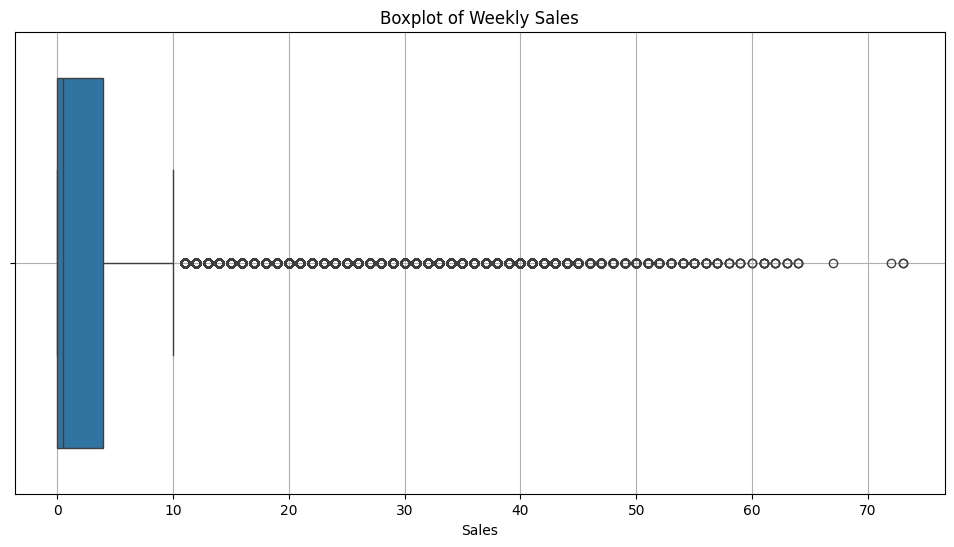


Total Outliers Detected: 12217
   Product_Code Week  Sales
0            P1   W0   11.0
3            P4   W0   12.0
8            P9   W0   14.0
9           P10   W0   22.0
10          P11   W0   15.0
Outliers saved to: ../outputs/Outliers_Detected.csv

--- Outlier Summary for Business Side Notes ---
25th Percentile (Q1): 0.0
75th Percentile (Q3): 4.0
Interquartile Range (IQR): 4.0
Lower Bound: -6.0
Upper Bound: 10.0

Example Outliers (Top 5):
   Product_Code Week  Sales
0            P1   W0   11.0
3            P4   W0   12.0
8            P9   W0   14.0
9           P10   W0   22.0
10          P11   W0   15.0

Outlier Detection Complete. Check the 'outputs' folder for files.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load the dataset
file_path = '../data/Sales_Transactions_Dataset_Weekly.csv'  # Adjust the path if needed
df = pd.read_csv(file_path)

# Create outputs folder if not exists (good practice)
output_folder = '../outputs/'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Melt the dataframe to bring weeks into a single column (tidy format)
df_melted = df.melt(id_vars=['Product_Code'], var_name='Week', value_name='Sales')

# Quick Data Preview (optional)
print("Data Preview:")
print(df_melted.head())

# Boxplot to visualize outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_melted['Sales'])
plt.title('Boxplot of Weekly Sales')
plt.xlabel('Sales')
plt.grid(True)

# Save the plot to outputs folder
plot_path = os.path.join(output_folder, 'Weekly_Sales_Boxplot.png')
plt.savefig(plot_path, dpi=300)
print(f"Boxplot saved as: {plot_path}")

# Also show the plot
plt.show()

# Outlier Calculation using IQR
Q1 = df_melted['Sales'].quantile(0.25)
Q3 = df_melted['Sales'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df_melted[(df_melted['Sales'] < lower_bound) | (df_melted['Sales'] > upper_bound)]

# Summary of outliers
print(f"\nTotal Outliers Detected: {len(outliers)}")
print(outliers.head())

# Save outliers to CSV (for further manual inspection if needed)
outlier_file_path = os.path.join(output_folder, 'Outliers_Detected.csv')
outliers.to_csv(outlier_file_path, index=False)
print(f"Outliers saved to: {outlier_file_path}")

# Summary Statistics for Business Notes
print("\n--- Outlier Summary for Business Side Notes ---")
print(f"25th Percentile (Q1): {Q1}")
print(f"75th Percentile (Q3): {Q3}")
print(f"Interquartile Range (IQR): {IQR}")
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

# Optional Insights (for business side documentation)
print("\nExample Outliers (Top 5):")
print(outliers[['Product_Code', 'Week', 'Sales']].head())

print("\nOutlier Detection Complete. Check the 'outputs' folder for files.")
